Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import sqlite3

In [2]:
# Load all datasets with full paths specified directly
bike_rentals = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/foursquare_bike_rentals.csv')
stations = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/stations_data.csv')
pois = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/pois_data.csv')
yelp_data = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/yelp_business_data.csv')
foursquare_restaurants = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/restaurants_df.csv')


In [3]:
# Normalize coordinates to ensure accurate joins
stations['latitude'] = stations['latitude'].round(6)
stations['longitude'] = stations['longitude'].round(6)
pois['station_lat'] = pois['station_lat'].round(6)
pois['station_lon'] = pois['station_lon'].round(6)
bike_rentals['rental_lat'] = bike_rentals['rental_lat'].round(6)
bike_rentals['rental_lon'] = bike_rentals['rental_lon'].round(6)

In [4]:
# Merge bike stations with POIs based on proximity or exact coordinates
merged_stations_pois = pd.merge(stations, pois, left_on=['latitude', 'longitude'], right_on=['station_lat', 'station_lon'], how='left')

In [5]:
# Merge bike rentals into the full dataset, assuming a rental is related to a station if nearby
merged_with_rentals = pd.merge(merged_stations_pois, bike_rentals, how='left', left_on=['latitude', 'longitude'], right_on=['rental_lat', 'rental_lon'])

In [6]:
# Load Yelp and Foursquare restaurant data with full paths
yelp_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/yelp_business_data.csv'
foursquare_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/restaurants_df.csv'

yelp_data = pd.read_csv(yelp_path)
foursquare_data = pd.read_csv(foursquare_path)

# Normalize the column names for easier merging
yelp_data.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
foursquare_data.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)

# Merge Yelp and Foursquare data based on restaurant names and locations (if exact matching is required)
merged_restaurants = pd.merge(yelp_data, foursquare_data, on=['Name', 'Location'], suffixes=('_yelp', '_foursquare'), how='outer')

# Show the merged data
print(merged_restaurants.head())


#save the merged DataFrame to a CSV file for further analysis
merged_restaurants.to_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/merged_restaurants.csv', index=False)

# Note: Merged Yelp and Foursquare restaurant and bar data to enhance dataset integrity:
# 1. Data Validation: Yelp's latitude and longitude help validate Foursquare's address accuracy.
# 2. Completeness: Integrating Yelp's geographic data compensates for Foursquare's missing coordinates.


                          Name  Rating_yelp                        Location  \
0  Orient Express Cocktail Bar          5.0  Carrer del Comte d'Urgell, 134   
1                      Ginette          5.0       Carrer del Rec Comtal, 12   
2                   Pasticelía          5.0            Carrer de París, 165   
3                      Itacate          5.0    Carrer de Comte Borrell, 107   
4                   Stop & Mos          5.0  Carrer de los Castillejos, 158   

    latitude  longitude  Rating_foursquare  
0  41.385068   2.154980                NaN  
1  41.389560   2.179810                NaN  
2  41.392290   2.151290                NaN  
3  41.379800   2.159220                NaN  
4  41.400958   2.186161                NaN  


In [7]:
# Load the data
stations = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/stations_data.csv')
bike_rentals = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/foursquare_bike_rentals.csv')
pois = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/pois_data.csv')
merged_restaurants = pd.read_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/merged_restaurants.csv')

# Standardize the coordinate columns across all datasets
stations.rename(columns={'latitude': 'latitude', 'longitude': 'longitude'}, inplace=True)  # if needed
bike_rentals.rename(columns={'rental_lat': 'latitude', 'rental_lon': 'longitude'}, inplace=True)
pois.rename(columns={'station_lat': 'latitude', 'station_lon': 'longitude'}, inplace=True)
merged_restaurants.rename(columns={'latitude': 'latitude', 'longitude': 'longitude'}, inplace=True)  # if needed

# Use reduce to merge all dataframes on 'latitude' and 'longitude'
from functools import reduce
dfs = [stations, bike_rentals, pois, merged_restaurants]
comprehensive_data = reduce(lambda left, right: pd.merge(left, right, on=['latitude', 'longitude'], how='outer'), dfs)

# Save the comprehensive DataFrame to a CSV file for further analysis
comprehensive_data.to_csv('/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/comprehensive_data.csv', index=False)

# Display the head of the comprehensive DataFrame to check the initial entries
print(comprehensive_data.head())



   Unnamed: 0_x            name  latitude  longitude  free_bikes rental_name  \
0           0.0  C/ BILBAO, 174  41.40902   2.195415         8.0         NaN   
1           0.0  C/ BILBAO, 174  41.40902   2.195415         8.0         NaN   
2           0.0  C/ BILBAO, 174  41.40902   2.195415         8.0         NaN   
3           0.0  C/ BILBAO, 174  41.40902   2.195415         8.0         NaN   
4           0.0  C/ BILBAO, 174  41.40902   2.195415         8.0         NaN   

  rental_address  Unnamed: 0_y                      poi_name    poi_lat  \
0            NaN           0.0             Els Tres Porquets  41.407088   
1            NaN           1.0                        Hangar  41.408581   
2            NaN           2.0                 Parc del Clot  41.407833   
3            NaN           3.0  Parc del Centre del Poblenou  41.406713   
4            NaN           4.0                     Tapa Tapa  41.404793   

    poi_lon Name  Rating_yelp Location  Rating_foursquare  
0  2.192

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import numpy as np

In [9]:
# Load the comprehensive dataset
data_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/comprehensive_data.csv'
data = pd.read_csv(data_path)

In [10]:
# Print basic info to check non-null counts and data summary
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0_x       234 non-null    float64
 1   name               234 non-null    object 
 2   latitude           293 non-null    float64
 3   longitude          293 non-null    float64
 4   free_bikes         234 non-null    float64
 5   rental_name        9 non-null      object 
 6   rental_address     9 non-null      object 
 7   Unnamed: 0_y       234 non-null    float64
 8   poi_name           234 non-null    object 
 9   poi_lat            234 non-null    float64
 10  poi_lon            234 non-null    float64
 11  Name               100 non-null    object 
 12  Rating_yelp        50 non-null     float64
 13  Location           100 non-null    object 
 14  Rating_foursquare  50 non-null     float64
dtypes: float64(9), object(6)
memory usage: 40.3+ KB
None
       Unnamed: 0_x  

In [11]:
# Ensure the columns 'Rating_yelp', 'latitude', and 'longitude' exist and check for their non-null values
if 'Rating_yelp' in data.columns and 'latitude' in data.columns and 'longitude' in data.columns:
    print("Columns exist and are correctly named.")
else:
    print("Column naming issue.")

Columns exist and are correctly named.


/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


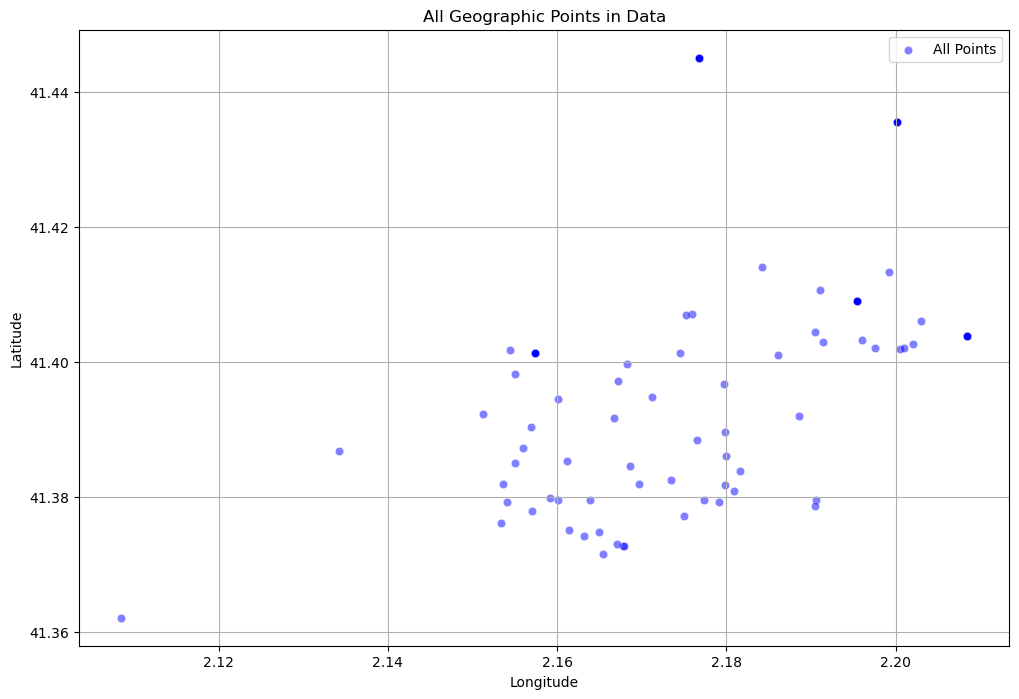

In [12]:
# Attempt to plot all points to diagnose the issue
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, color='blue', label='All Points', alpha=0.5)
plt.title('All Geographic Points in Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

High-rated restaurants count: 50


/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


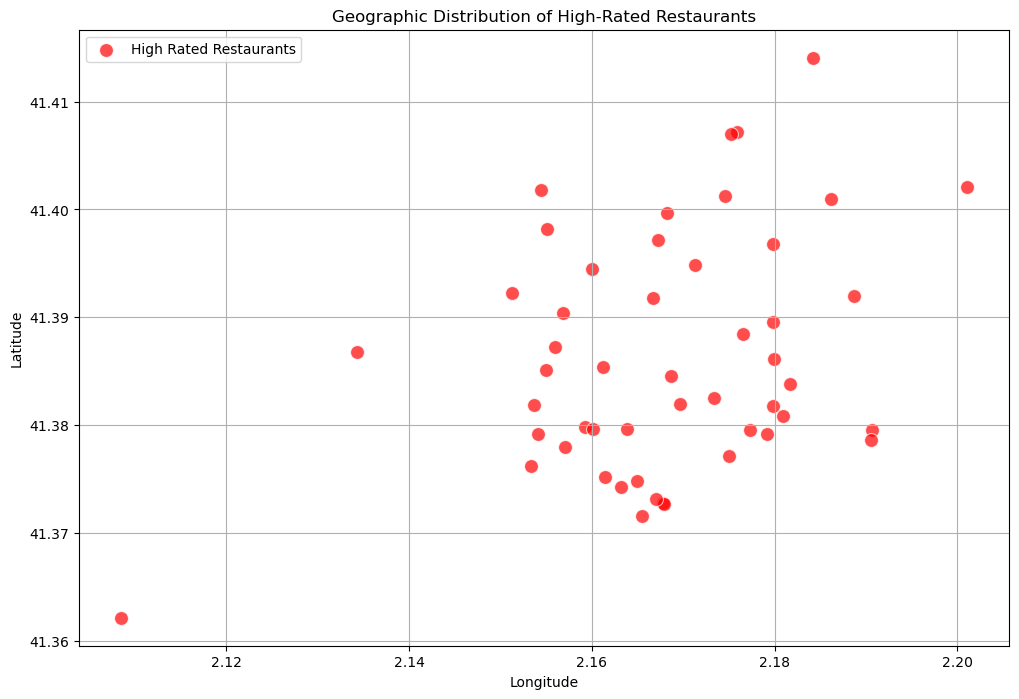

In [13]:
# Filter for high-rated restaurants if data is appropriate
if data['Rating_yelp'].notna().sum() > 0:
    high_rated_restaurants = data[(data['Rating_yelp'] > 4) & (data['Rating_yelp'].notna())]
    print(f"High-rated restaurants count: {len(high_rated_restaurants)}")

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='longitude', y='latitude', data=high_rated_restaurants, color='red', label='High Rated Restaurants', s=100, alpha=0.7)
    plt.title('Geographic Distribution of High-Rated Restaurants')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()
else:
    print("No valid Yelp ratings available for plotting.")

/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jorgen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

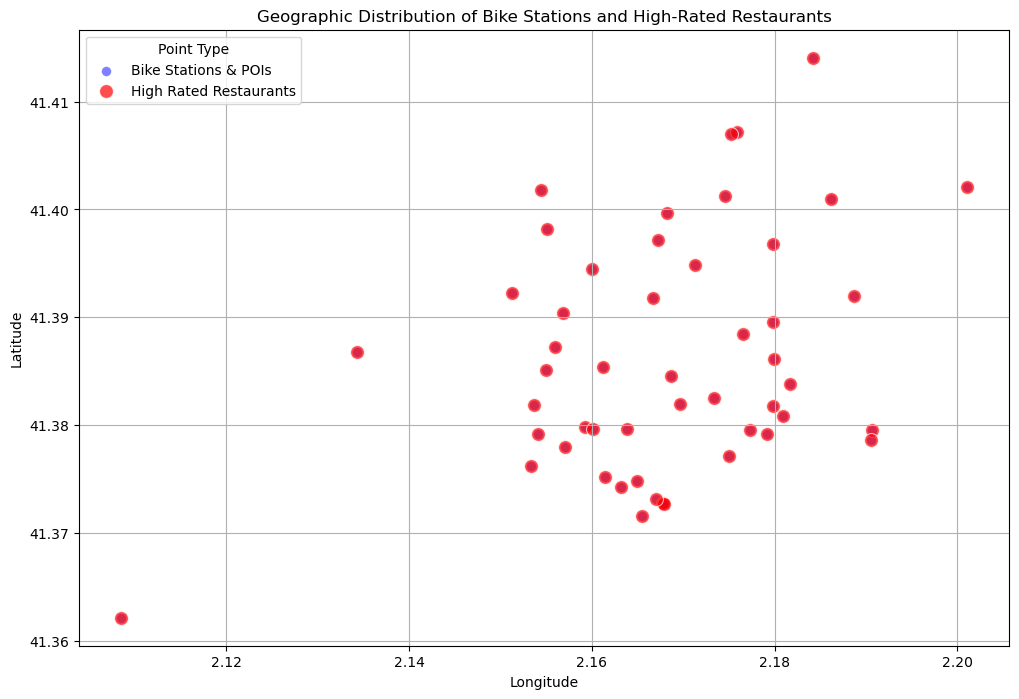

In [14]:
# Load the comprehensive dataset
data_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/comprehensive_data.csv'
data = pd.read_csv(data_path)

# Filter out entries without necessary geographic or rating information
data.dropna(subset=['latitude', 'longitude', 'Rating_yelp'], inplace=True)

# Plotting all geographic points for context
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, color='blue', label='Bike Stations & POIs', alpha=0.5, s=50)

# Filter for high-rated restaurants and plot them
high_rated_restaurants = data[data['Rating_yelp'] > 4]
sns.scatterplot(x='longitude', y='latitude', data=high_rated_restaurants, color='red', label='High Rated Restaurants', s=100, alpha=0.7)

plt.title('Geographic Distribution of Bike Stations and High-Rated Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Point Type')
plt.show()

/var/folders/8n/0r42jsb57hn5qqr_97pb0d240000gn/T/ipykernel_1138/3801178789.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_stations['Min Distance to High Rated Restaurant'] = bike_stations.apply(min_distance_to_restaurant, args=(high_rated_restaurants,), axis=1)


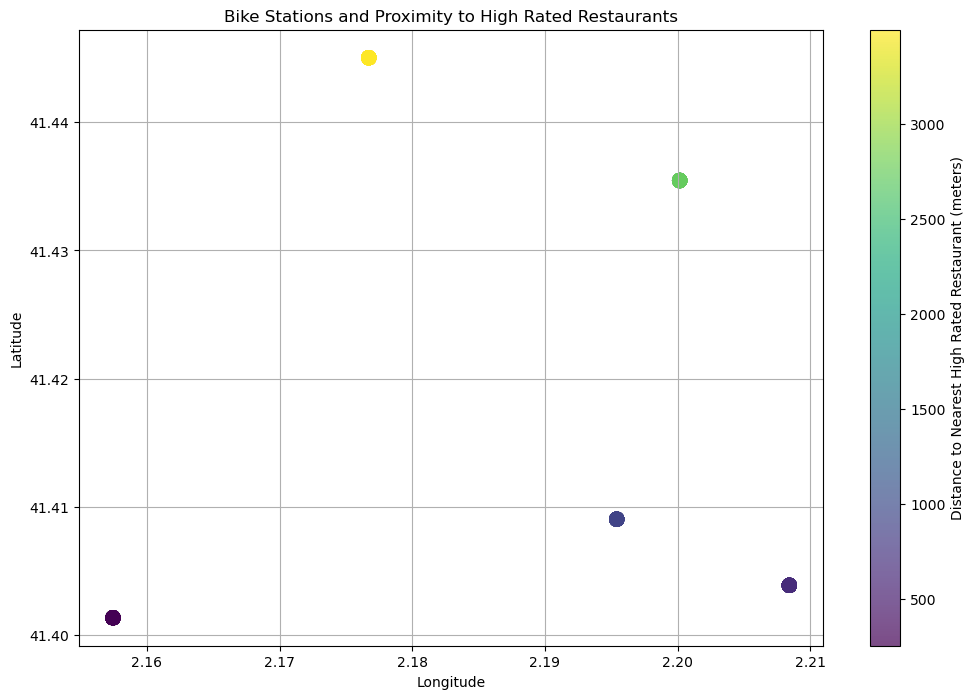

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

data_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/comprehensive_data.csv'
data = pd.read_csv(data_path)

# Note: filter for bike stations and high-rated restaurants separately.
bike_stations = data[data['free_bikes'].notna()]
high_rated_restaurants = data[data['Rating_yelp'] > 4]

# Define a function to calculate the minimum distance to a high-rated restaurant for each bike station.
# Note: The function uses geodesic distance, which accounts for the curvature of the earth,
def min_distance_to_restaurant(station, restaurants):
    station_location = (station['latitude'], station['longitude'])
    # Calculate distances from the current station to all high-rated restaurants
    distances = restaurants.apply(lambda x: geodesic(station_location, (x['latitude'], x['longitude'])).meters, axis=1)
    return distances.min()

# Calculate the minimum distance for each bike station to the nearest high-rated restaurant.
# Note: Applying this function across all bike stations helps me understand the accessibility
# of quality dining from different bike stations.
bike_stations['Min Distance to High Rated Restaurant'] = bike_stations.apply(min_distance_to_restaurant, args=(high_rated_restaurants,), axis=1)

# Plotting the results with a scatter plot.
# Student Note: Each point represents a bike station, color-coded by the distance to the nearest high-rated restaurant.
# This visualization helps in quickly identifying areas with better access to high-quality dining,
plt.figure(figsize=(12, 8))
scatter = plt.scatter(bike_stations['longitude'], bike_stations['latitude'], c=bike_stations['Min Distance to High Rated Restaurant'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Distance to Nearest High Rated Restaurant (meters)')
plt.title('Bike Stations and Proximity to High Rated Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [16]:
# SQLite database
database_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/project_data.db'

conn = sqlite3.connect(database_path)

# Create a new table to hold all data
conn.execute('''
CREATE TABLE IF NOT EXISTS comprehensive_data (
    id INTEGER PRIMARY KEY,
    name TEXT,
    latitude REAL,
    longitude REAL,
    free_bikes INTEGER,
    rental_name TEXT,
    rental_lat REAL,
    rental_lon REAL,
    rental_address TEXT,
    poi_name TEXT,
    poi_lat REAL,
    poi_lon REAL
);
''')

# Insert data from the stations table
conn.execute('''
INSERT INTO comprehensive_data (name, latitude, longitude, free_bikes)
SELECT name, latitude, longitude, free_bikes FROM stations;
''')

# Insert data from the bike_rentals table
conn.execute('''
INSERT INTO comprehensive_data (rental_name, rental_lat, rental_lon, rental_address)
SELECT rental_name, rental_lat, rental_lon, rental_address FROM bike_rentals;
''')

# Insert data from the POIs table
conn.execute('''
INSERT INTO comprehensive_data (poi_name, poi_lat, poi_lon)
SELECT poi_name, poi_lat, poi_lon FROM pois;
''')

# Insert data from the merged_restaurants table
conn.execute('''
INSERT INTO comprehensive_data (name, latitude, longitude)
SELECT name, latitude, longitude FROM merged_restaurants;
''')

conn.commit()  # Commit changes to the database

# Close the database connection
conn.close()


Look at the data before and after the join to validate your data.

In [17]:
database_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/project_data.db'

conn = sqlite3.connect(database_path)

#SQL query
query = """
SELECT s.*, b.rental_name, b.rental_lat, b.rental_lon, b.rental_address
FROM stations s
LEFT JOIN bike_rentals b
"""

# SQL query to validate existence of database with accurate data
results = pd.read_sql_query(query, conn)

# Display the DataFrame to see the results
print(results.head(10))  # Adjust the number for how many rows you want to see

# Close the database connection
conn.close()

   Unnamed: 0               name  latitude  longitude  free_bikes  \
0           0     C/ BILBAO, 174  41.40902   2.195415           8   
1           0     C/ BILBAO, 174  41.40902   2.195415           8   
2           0     C/ BILBAO, 174  41.40902   2.195415           8   
3           0     C/ BILBAO, 174  41.40902   2.195415           8   
4           0     C/ BILBAO, 174  41.40902   2.195415           8   
5           0     C/ BILBAO, 174  41.40902   2.195415           8   
6           0     C/ BILBAO, 174  41.40902   2.195415           8   
7           0     C/ BILBAO, 174  41.40902   2.195415           8   
8           0     C/ BILBAO, 174  41.40902   2.195415           8   
9           1  C/ SANT ADRIÀ, 88  41.43546   2.200157           5   

                 rental_name  rental_lat  rental_lon  \
0  Biciclo taller bicicletes   41.410596    2.191013   
1                 Bicing 382   41.413293    2.199218   
2                 Bicing 143   41.403226    2.195978   
3               